In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

## Load Dataset

In [3]:
data=pd.read_csv("D:\data.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


 ## Data Cleaning

In [4]:
data.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [5]:
data[data.duplicated(keep='last')]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
148,0.096200,0.654,252095,0.292,0.003100,2,0.106,-12.977,1,0.4740,153.547,4.0,0.111,1,River,Ibeyi
172,0.024600,0.586,374133,0.806,0.000167,1,0.353,-9.542,1,0.0548,110.325,4.0,0.207,1,Her Fantasy,Matthew Dear
480,0.036900,0.448,258653,0.733,0.042500,3,0.169,-6.238,1,0.0292,142.008,4.0,0.404,1,Myth,Beach House
714,0.000334,0.907,183581,0.616,0.425000,6,0.110,-7.073,0,0.0577,124.036,4.0,0.614,1,Jack,Breach
854,0.934000,0.440,254360,0.433,0.811000,2,0.273,-17.453,0,0.0412,79.952,4.0,0.217,1,Episode I - Duel of The Fates,John Williams


In [6]:
df=data.drop_duplicates(keep='first')
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [7]:
df[df.duplicated()]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2012 non-null   float64
 1   danceability      2012 non-null   float64
 2   duration_ms       2012 non-null   int64  
 3   energy            2012 non-null   float64
 4   instrumentalness  2012 non-null   float64
 5   key               2012 non-null   int64  
 6   liveness          2012 non-null   float64
 7   loudness          2012 non-null   float64
 8   mode              2012 non-null   int64  
 9   speechiness       2012 non-null   float64
 10  tempo             2012 non-null   float64
 11  time_signature    2012 non-null   float64
 12  valence           2012 non-null   float64
 13  target            2012 non-null   int64  
 14  song_title        2012 non-null   object 
 15  artist            2012 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [9]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [10]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2012.000000,2012.000000,2.012000e+03,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,0.187513,0.618450,2.462608e+05,0.681840,0.132980,5.348907,0.190816,-7.076750,0.612326,0.092568,121.602351,3.968191,0.497278,0.504473
std,0.259691,0.161003,8.202146e+04,0.210255,0.272967,3.649559,0.155571,3.756502,0.487341,0.089615,26.687988,0.256166,0.247167,0.500104
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009590,0.514000,2.000045e+05,0.563750,0.000000,2.000000,0.092200,-8.392250,0.000000,0.037500,100.164000,4.000000,0.296000,0.000000
50%,0.063500,0.631000,2.291200e+05,0.715500,0.000074,6.000000,0.126500,-6.247500,1.000000,0.054900,121.407000,4.000000,0.493000,1.000000
75%,0.265000,0.738000,2.703565e+05,0.846000,0.053925,9.000000,0.246250,-4.744000,1.000000,0.108000,137.695250,4.000000,0.692000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### Top 5 most popular artists

In [11]:
top_artists=df['artist'].value_counts()[:5]
top_artists

Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: artist, dtype: int64

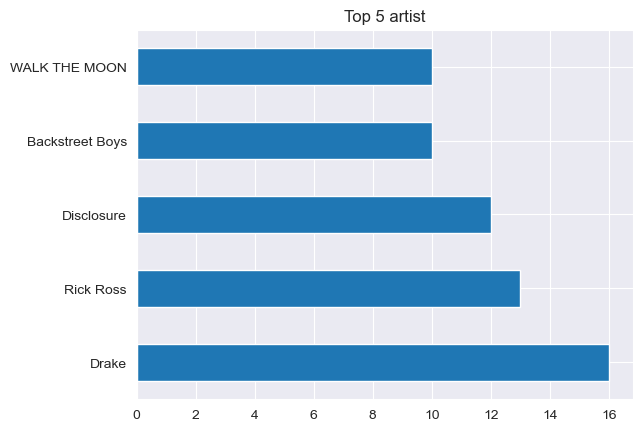

In [12]:
top_artists.plot(kind='barh')
plt.title('Top 5 artist')
plt.show()

In [13]:
df.groupby('artist').get_group('Drake')['song_title']

5                        Sneakin’
6                     Childs Play
37                        Jumpman
117                 Hotline Bling
154                     Big Rings
158                 Know Yourself
168               Wu-Tang Forever
440                     Headlines
589       Started From the Bottom
676     Hold On, We're Going Home
717     Hold On, We're Going Home
779       0 To 100 / The Catch Up
1016             Skepta Interlude
1183                 Passionfruit
1218              Best I Ever Had
1223                    Take Care
Name: song_title, dtype: object

In [14]:
Top_loudest_track=df[['loudness','song_title']].sort_values(by='loudness',ascending=True)[:5]
Top_loudest_track

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


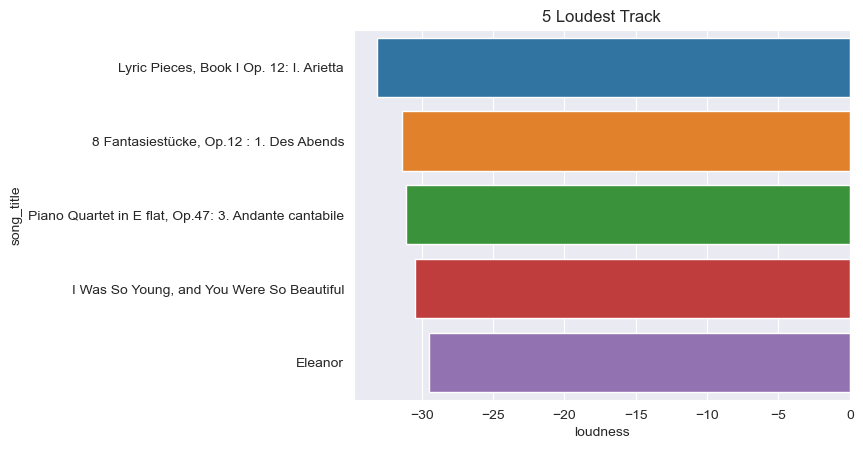

In [15]:
sns.barplot(x='loudness', y='song_title', data=Top_loudest_track)
plt.title('5 Loudest Track')
plt.show()

### Artist with most danceablity song

In [16]:
danceable_songs=df[['danceability','song_title','artist']].nlargest(5,'danceability')
danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


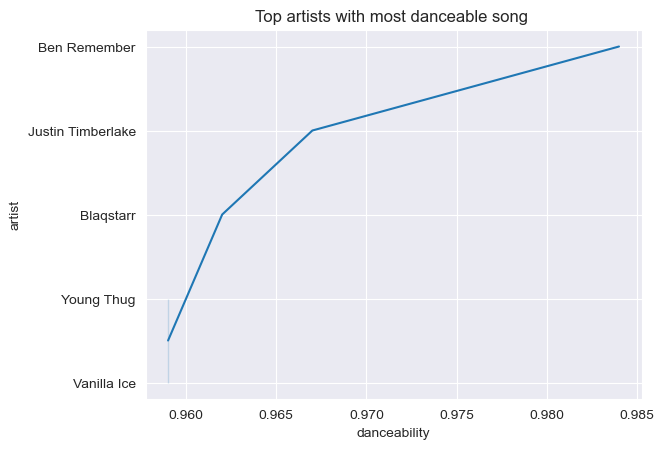

In [17]:
sns.lineplot(x='danceability', y='artist', data=danceable_songs)
plt.title('Top artists with most danceable song ')
plt.show()

### Top 10 instrumental tracks

In [18]:
inst_songs=df[['instrumentalness','song_title','artist']].nlargest(5,'instrumentalness')
inst_songs

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


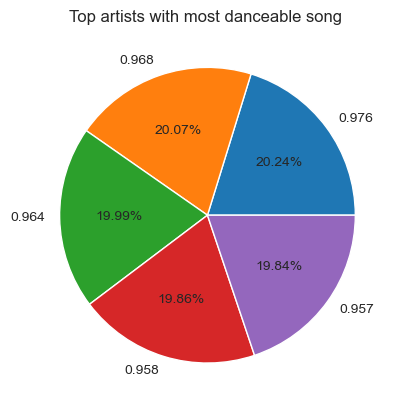

In [19]:
plt.pie(x='instrumentalness', data=inst_songs,labels='instrumentalness',autopct='%1.2f%%')
plt.title('Top artists with most danceable song ')
plt.show()

### Multiple Feature Plots

In [20]:
interest_feature_cols = ["tempo", "loudness", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness", "liveness", "speechiness", "valence"]

C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


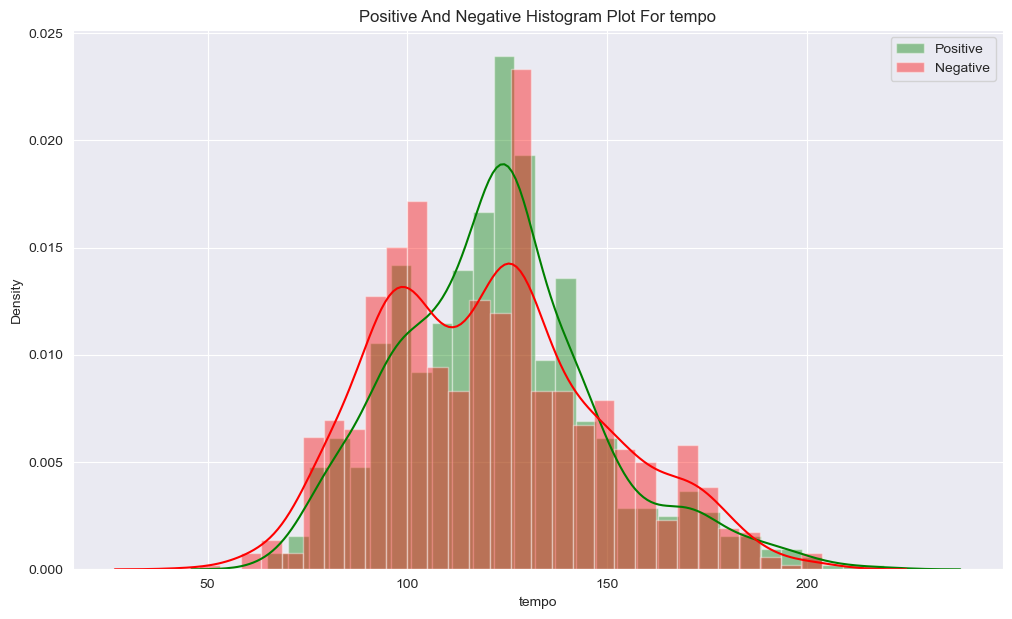

C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


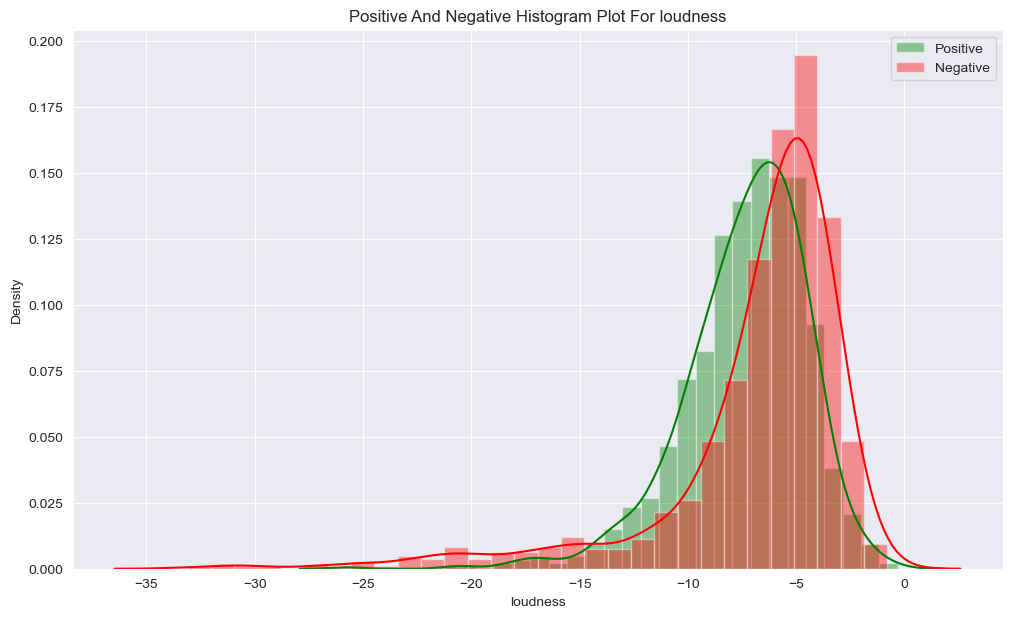

C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


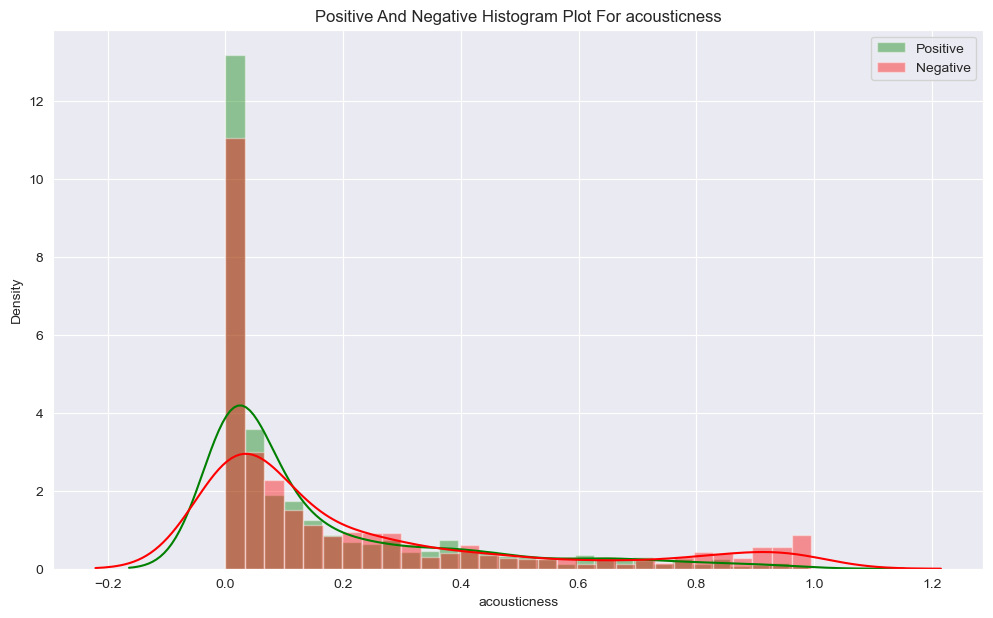

C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


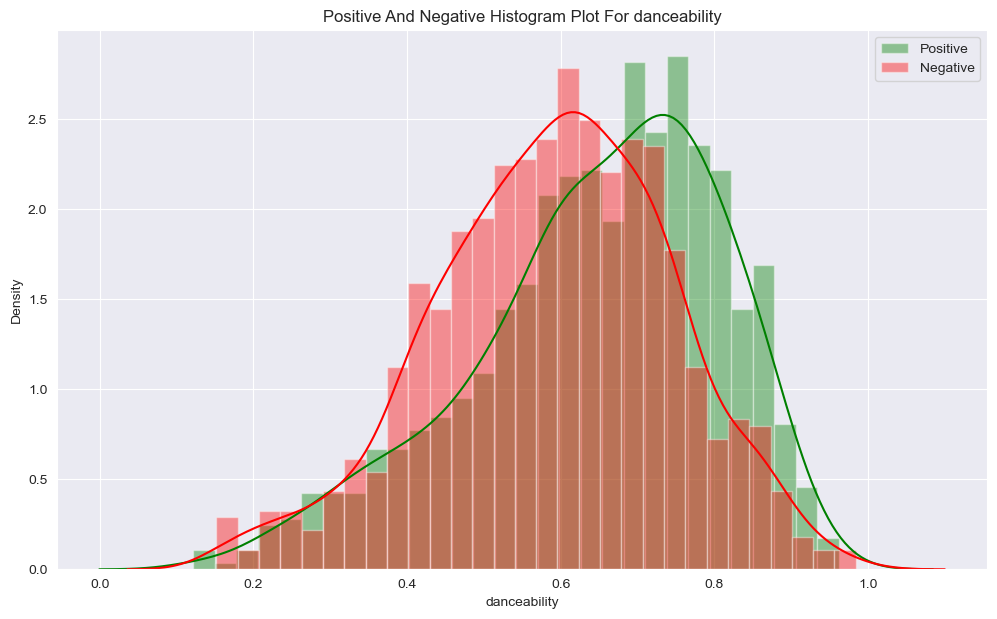

C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


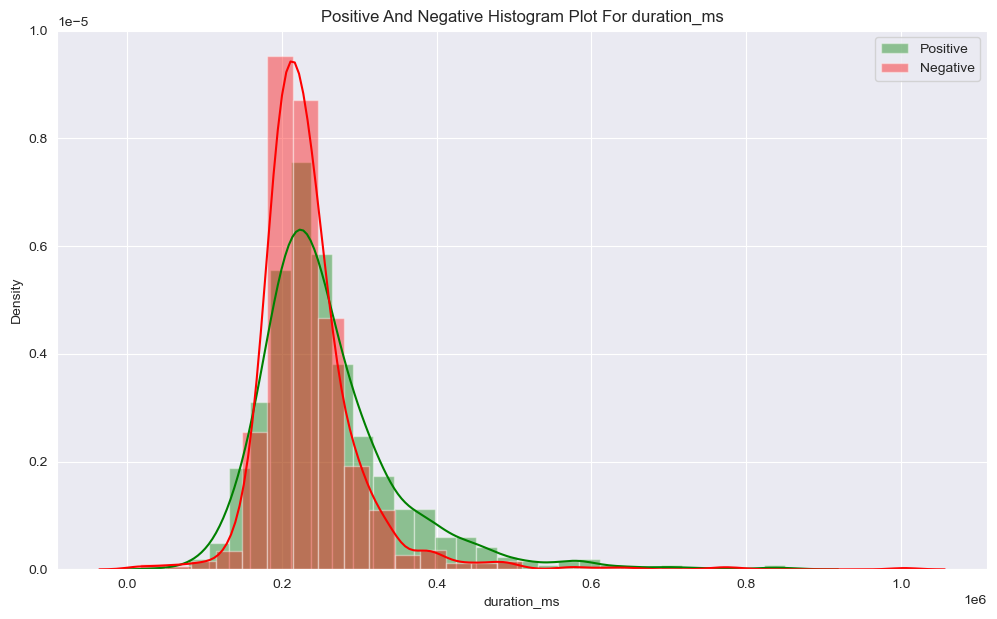

C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


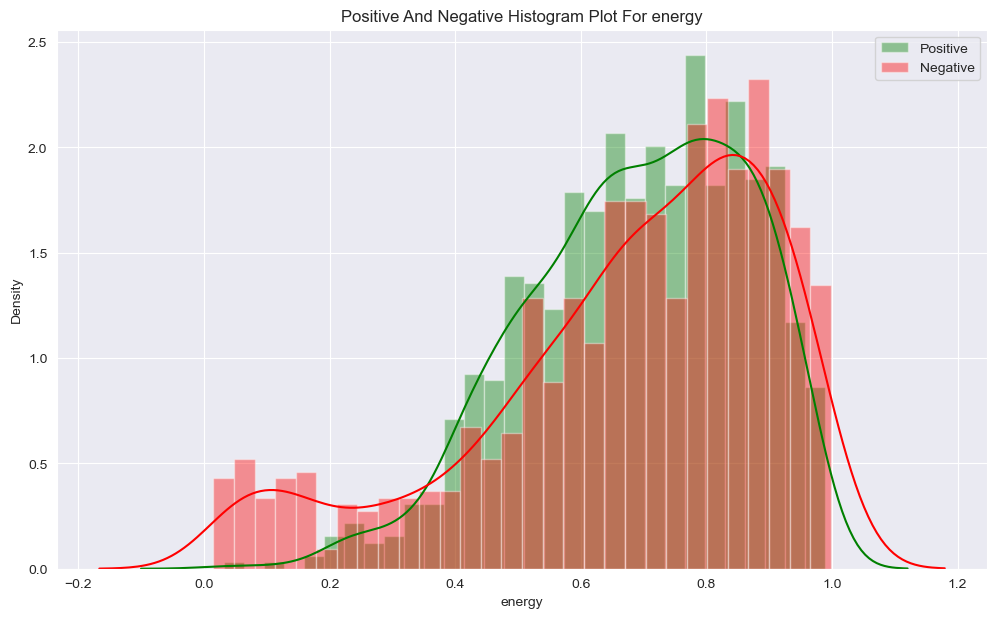

C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


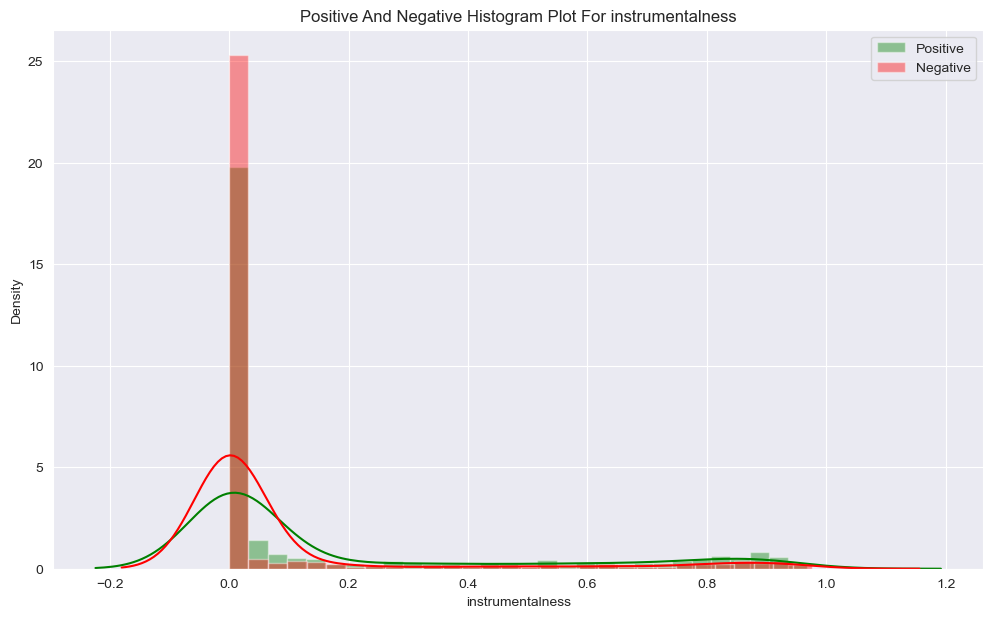

C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


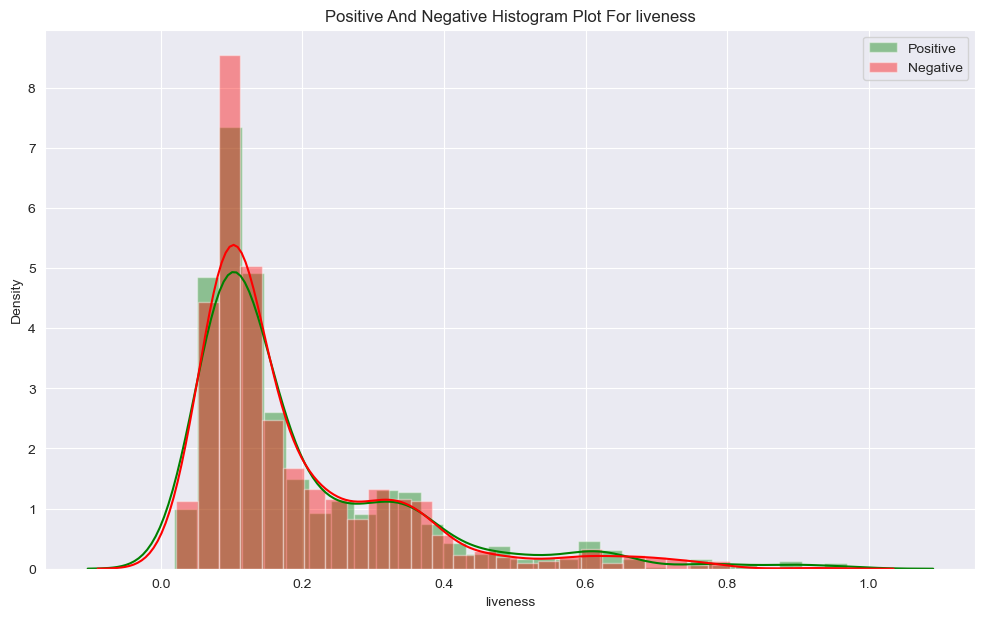

C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


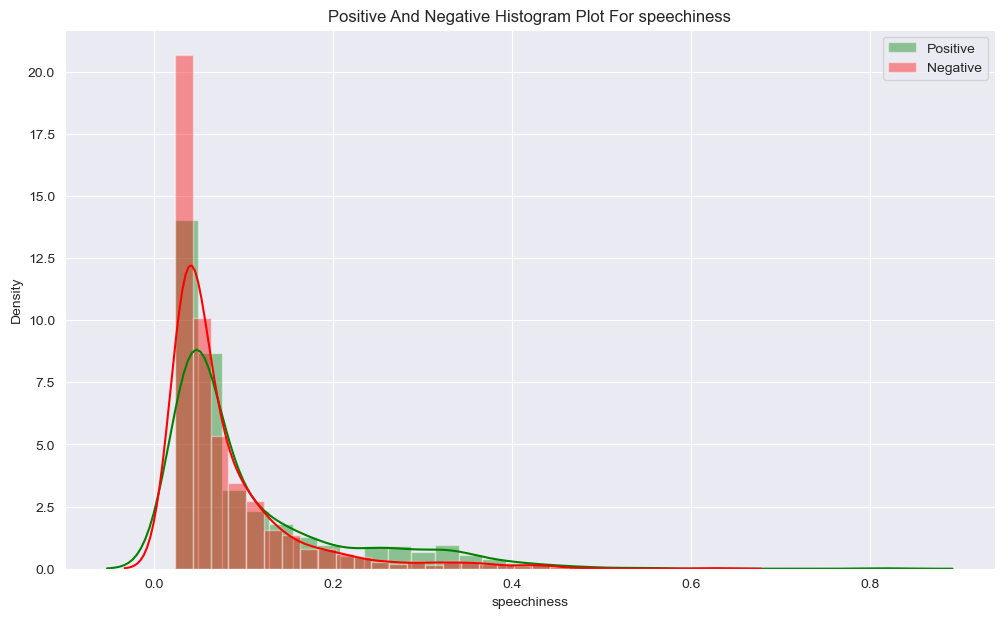

C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


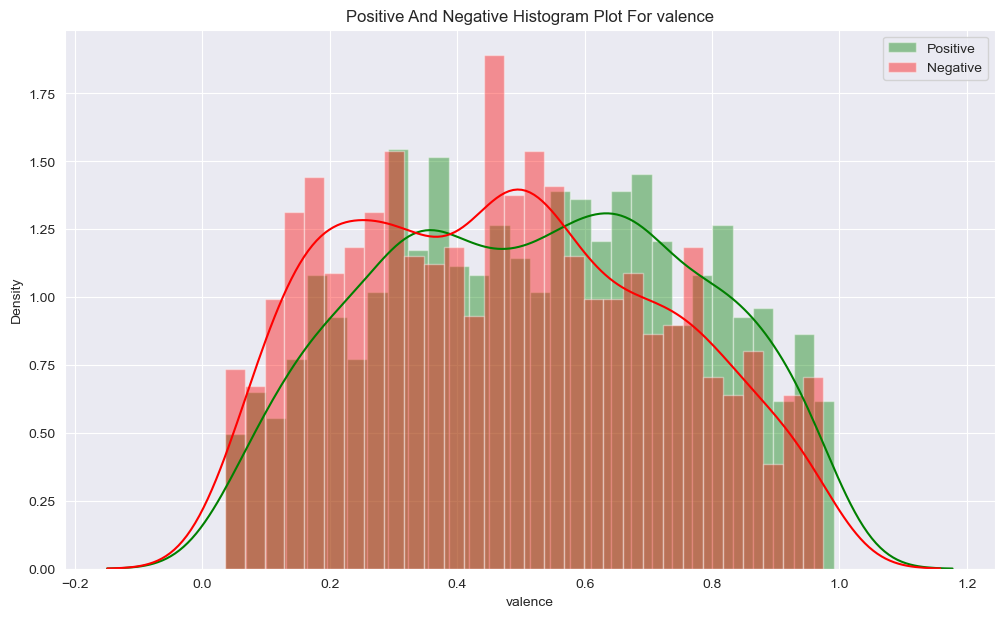

In [23]:
for feature_col in interest_feature_cols:
    pos_data = df[df["target"] == 1][feature_col]
    neg_data = df[df["target"] == 0][feature_col]
    
    plt.figure(figsize=(12, 7))
    
    
    sns.distplot(pos_data, bins=30, label="Positive", color="green")
    sns.distplot(neg_data, bins=30, label="Negative", color="red")
    
    
    plt.legend(loc="upper right")
    plt.title(f"Positive And Negative Histogram Plot For {feature_col}")
    plt.show()